In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec

In [2]:
def initializesquare(R):
    grid = np.zeros((2*R + 1, 2*R+ 1))
    #initialize square potential
    a = int(4/5 * R)
    b = int(6/5 * R)
    for x in range(a,b+1):
        grid[a][x] = 1
        grid[b][x] = 1
        grid[x][a] = 1
        grid[x][b]= 1
    firstgrid = copy.deepcopy(grid)
    
    mask = grid.astype(bool)
    mask[0,:] = True
    mask[:,0] = True
    mask[2*R,:] = True
    mask[:,2*R] = True

    return grid, mask

In [3]:
def relaxgrid(grid, mask):
    (i,j) = np.where(~mask)
    maxchange = np.inf
    N = 0
    while(maxchange > .01):
        N += 1
        maxchange = 0
        beforegrid = copy.deepcopy(grid)
        grid[i,j] = (grid[i+1,j] + grid[i-1,j] + grid[i,j+1] + grid[i,j-1])/4
        np.seterr(divide = 'ignore')
        np.seterr(divide='ignore', invalid='ignore')
        fracchange = abs(beforegrid - grid) / beforegrid
        maxchange = np.nanmax(fracchange)
    return grid, N

In [4]:
startgrid, mask = initializesquare(25)
grid = copy.deepcopy(startgrid)
endgrid, N25 = relaxgrid(grid, mask)
print(N25)

251


In [5]:
startgrid, mask = initializesquare(50)
grid = copy.deepcopy(startgrid)
endgrid, N50 = relaxgrid(grid, mask)
print(N50)

547


In [6]:
startgrid, mask = initializesquare(100)
grid = copy.deepcopy(startgrid)
endgrid, N100 = relaxgrid(grid, mask)
print(N100)

1145


In [10]:
startgrid, mask = initializesquare(200)
grid = copy.deepcopy(startgrid)
endgrid, N200 = relaxgrid(grid, mask)
print(N200)

2343


The total number of computations = pixels * iterations

R = 25
Computations = 50*50*251
 = 627500

R = 50
Computations = 100*100*547
 = 5470000

R = 100
Computations = 200*200*1145
 = 45800000

R = 200
Computations = 400*400*2343
 = 374880000

Text(0, 0.5, 'Total Number of Compuations')

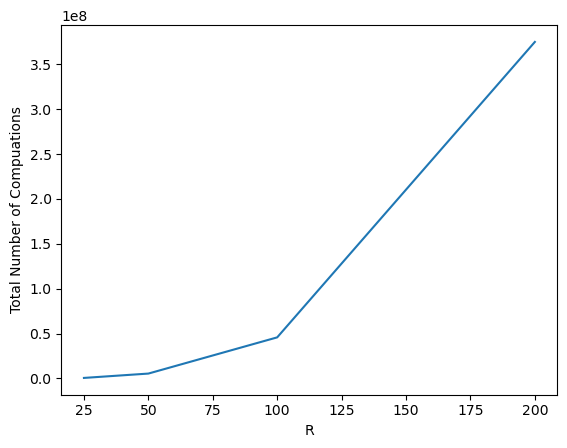

In [16]:
plt.plot([25,50,100,200],[627500, 5470000, 45800000, 374880000])
plt.xlabel("R")
plt.ylabel("Total Number of Compuations")

Total number of computations increases exponentially compared to the grid radius.